<a href="https://colab.research.google.com/github/ind-kum/DEEP-LEARNING-PROJECTS/blob/master/Deep_Learning_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
import os

batch_size = 32
num_classes = 10
epochs = 50

In [ ]:
# Loads the CIFAR dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display our data shape/dimensions
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# formate our training data by normalizing and changing data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Now we one hot encode outputs
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
model = Sequential()

# Padding = 'same' results in padding the input such that
# the output has the some Length as the original input
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same',))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSdrop optimizer and configure same parameters
opt = keras.optimizers.RMSprop(lr=0.001, decay=1e-6)

# Lets create our model
model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

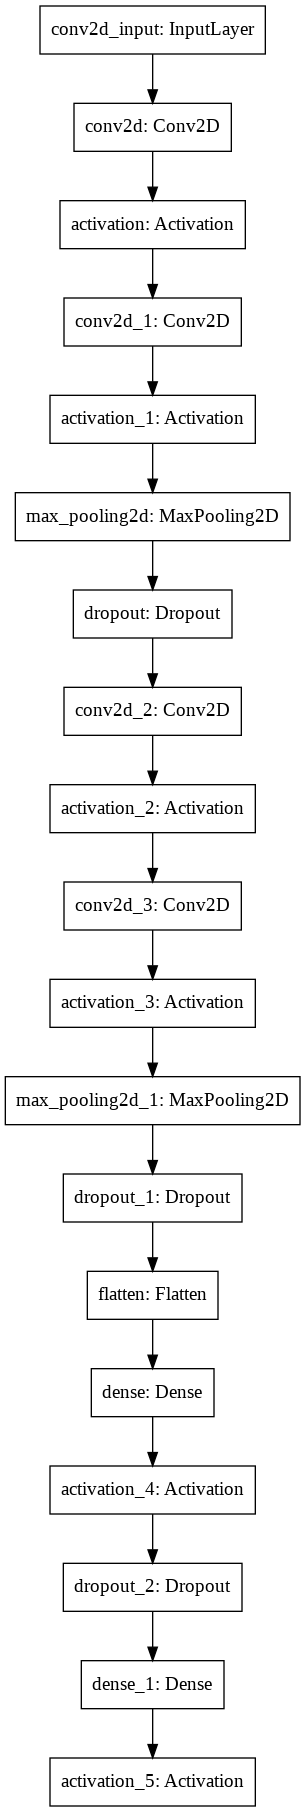

In [ ]:
keras.utils.plot_model(
model,
to_file="model_cifar.png"
)

In [ ]:
history = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_data=(x_test, y_test),
                   shuffle=True)

model.save("cifar_simple_cnn_2.h5")

# Evaluate the performace of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/50
1563/1563 [==============================] - 230s 146ms/step - loss: 1.7891 - accuracy: 0.3482 - val_loss: 1.1768 - val_accuracy: 0.5737
Epoch 2/50
1563/1563 [==============================] - 227s 145ms/step - loss: 1.1940 - accuracy: 0.5804 - val_loss: 1.0151 - val_accuracy: 0.6467
Epoch 3/50
1563/1563 [==============================] - 229s 146ms/step - loss: 1.0598 - accuracy: 0.6318 - val_loss: 0.9915 - val_accuracy: 0.6626
Epoch 4/50
1563/1563 [==============================] - 231s 148ms/step - loss: 1.0047 - accuracy: 0.6519 - val_loss: 0.9578 - val_accuracy: 0.6771
Epoch 5/50
1563/1563 [==============================] - 236s 151ms/step - loss: 0.9935 - accuracy: 0.6675 - val_loss: 1.0377 - val_accuracy: 0.6508
Epoch 6/50
1563/1563 [==============================] - 235s 150ms/step - loss: 1.0022 - accuracy: 0.6671 - val_loss: 0.9257 - val_accuracy: 0.6892
Epoch 7/50
1563/1563 [==============================] - 235s 151ms/step - loss: 1.0052 - accuracy: 0.6677 - val_

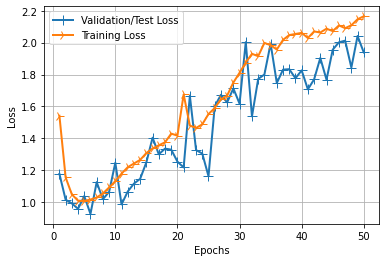

In [ ]:

# plotting out loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

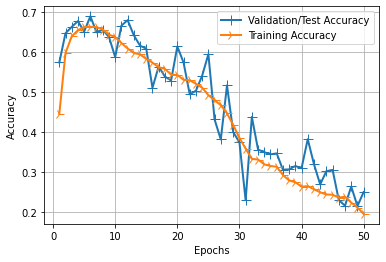

In [ ]:

# Plotting the accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()